In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv(r"C:\Users\DJILLALI\Desktop\Fondements du Data Science\diabetes\diabetes.csv")

# Explore Data

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Encodage

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Analysis

<Axes: >

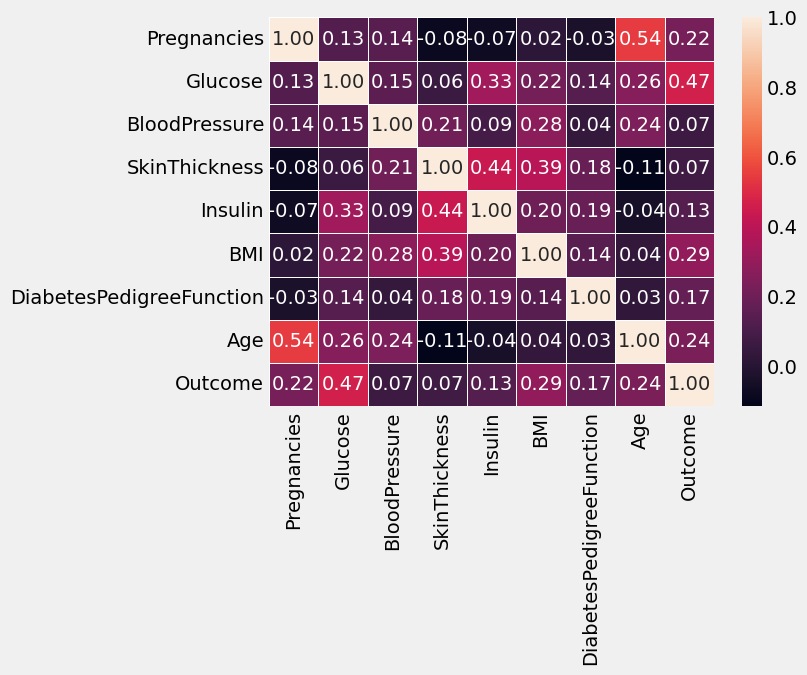

In [8]:
sns.heatmap(data.corr(),annot = True,fmt='0.2f',linewidth=.5)

In [9]:
df['Outcome'].value_counts()

NameError: name 'df' is not defined

In [ ]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])

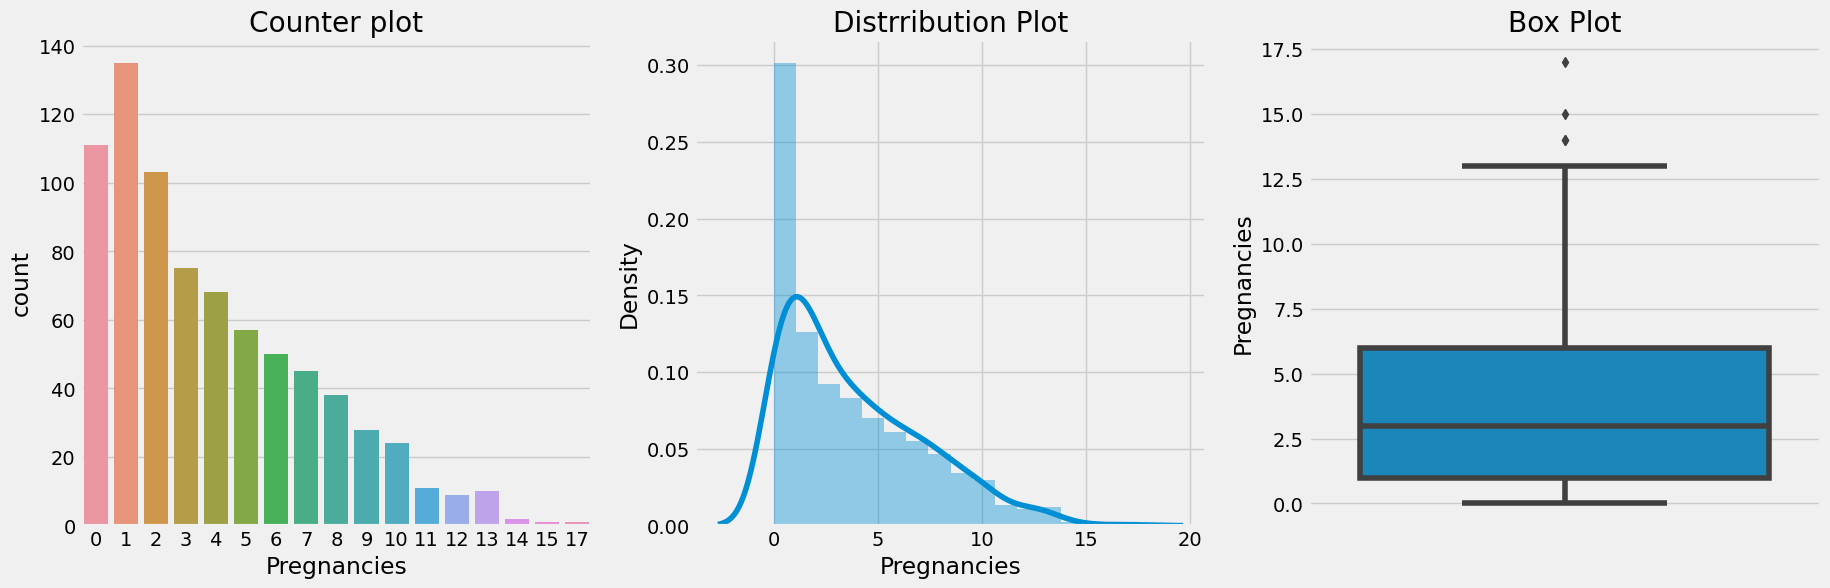

In [10]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Counter plot')
sns.countplot(x='Pregnancies',data=data)

plt.subplot(1,3,2)
plt.title('Distrribution Plot')
sns.distplot(data['Pregnancies'])

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=data['Pregnancies'])

plt.show()

# Create Model

In [11]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier()
model4=GradientBoostingClassifier(n_estimators=1000)

In [14]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]
result4=[]

LogisticRegression()
accuracy is : 0.7662337662337663 recall is : 0.7142857142857143 f1 is : 0.6250000000000001


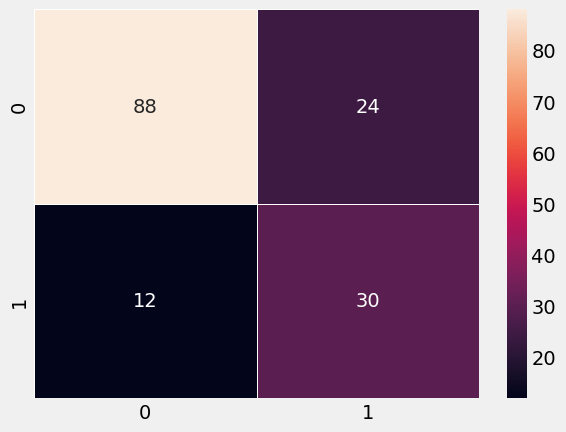

In [15]:
def cal(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
        
    sns.heatmap(confusion_matrix(pre,y_test),annot = True,linewidth=.5)
    print(model)
    print('accuracy is :',accuracy,'recall is :',recall,'f1 is :',f1)
cal(model1)

SVC()
accuracy is : 0.7662337662337663 recall is : 0.7368421052631579 f1 is : 0.6086956521739131


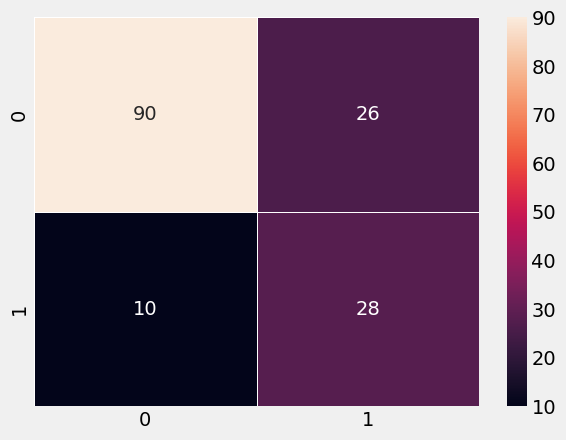

In [16]:
cal(model2)

RandomForestClassifier()
accuracy is : 0.7662337662337663 recall is : 0.7142857142857143 f1 is : 0.6250000000000001


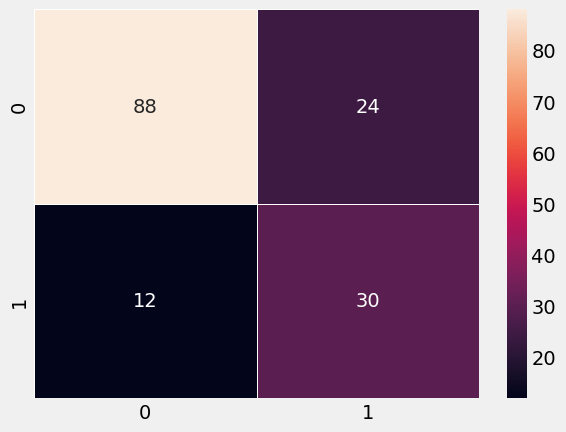

In [17]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is : 0.7337662337662337 recall is : 0.6326530612244898 f1 is : 0.6019417475728156


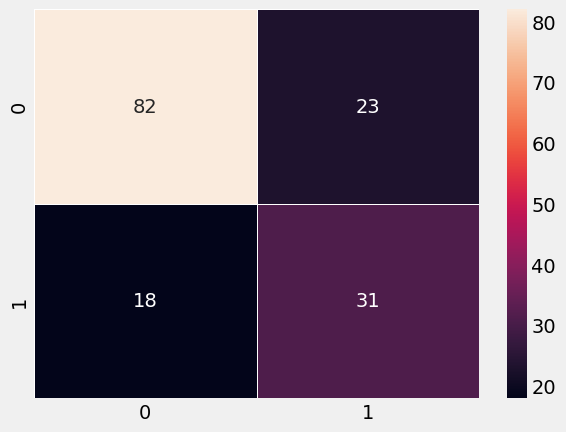

In [18]:
cal(model4)

In [19]:
FinalResult=pd.DataFrame({'Algoritms':columns,'Accuracy':result1,'Recall':result2,'F1':result3})

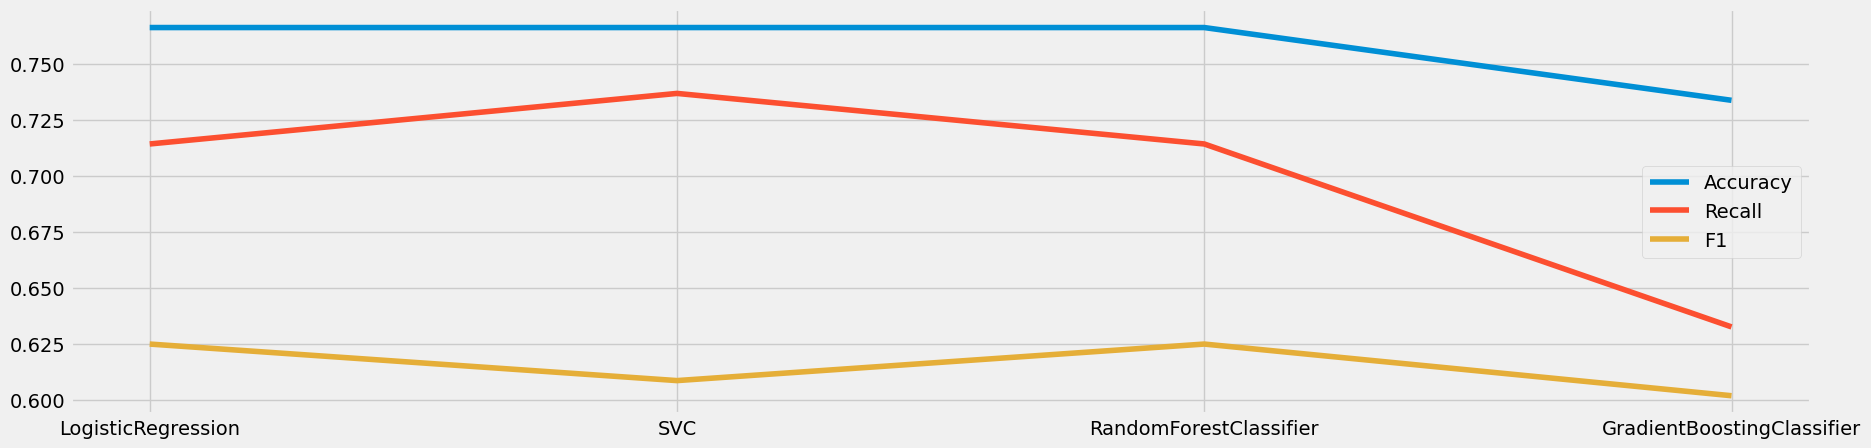

In [20]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algoritms,result1,label='Accuracy')
plt.plot(FinalResult.Algoritms,result2,label='Recall')
plt.plot(FinalResult.Algoritms,result3,label='F1')
plt.legend()
plt.show()